In [15]:
%pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement torch (from versions: none)
ERROR: No matching distribution found for torch

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import fastparquet
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import pipeline

In [6]:
# Read the data
df = pd.read_csv('datasets/dataset_mencion1.csv', parse_dates=['date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100002 entries, 0 to 100001
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   date                      100002 non-null  datetime64[ns, UTC]
 1   id                        100002 non-null  int64              
 2   rawContent                100002 non-null  object             
 3   replyCount                100002 non-null  int64              
 4   retweetCount              100002 non-null  int64              
 5   likeCount                 100002 non-null  int64              
 6   quoteCount                100002 non-null  int64              
 7   viewCount                 0 non-null       float64            
 8   lang                      100002 non-null  object             
 9   coordinates               3324 non-null    object             
 10  place                     3324 non-null    object             
 11  

In [8]:
# parse date
# df['date'] = pd.to_datetime(df['date'])
df['date_day'] = df['date'].dt.date
df['date_month'] = df['date'].dt.strftime('%Y-%m')

In [9]:
# set sns style
sns.set_style('whitegrid')
sns.set_palette('afmhot')

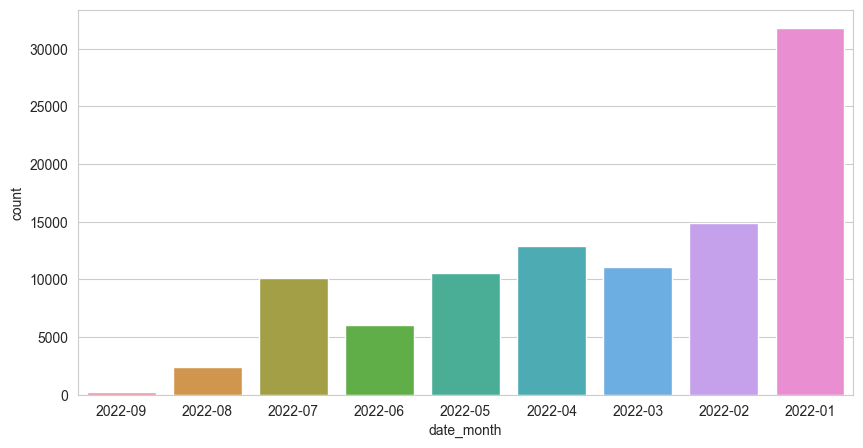

In [11]:
# basic plot de datos
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='date_month', data=df, ax=ax)
plt.show()

In [12]:
# analisis de sentimiento

classifier = pipeline('sentiment-analysis', model="nlptown/bert-base-multilingual-uncased-sentiment")

sentences = df['rawContent'].tolist()[:100]

results = classifier(sentences)
for result in results:
    print(f"polaridad: {result['label']}, score: {round(result['score'], 4)}")

c:\Users\alniquia\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:129: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\alniquia\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.

In [ ]:
# plot sentimiento
fig, ax = plt.subplots(figsize=(14, 8))
sns.scatterplot(x='date_day', y='sentiment', data=df, ax=ax, alpha=0.8)
plt.show()

In [ ]:
# plot sentimiento
avg_day = df[['date_day', 'sentiment']].groupby('date_day').mean()

fig, ax = plt.subplots(figsize=(14, 8))
sns.lineplot(x=avg_day.index, y='sentiment', data=avg_day, ax=ax)
plt.show()